In [42]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

#### Reading the data
1. Load the Visium spatial transcriptomics dataset from the specified folder.
2. Ensure that all gene names are unique to avoid conflicts during analysis.
3. Create a new column in the gene metadata to flag mitochondrial genes.
4. Calculate quality control (QC) metrics, including the percentage of mitochondrial gene expression.These metrics help assess the quality of each spot/cell in the dataset

In [ ]:
adata = sc.read_visium('DD073R_D1_processed') 

In [ ]:
adata.var_names_make_unique()

adata.var['mt'] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\1956182908.py:1: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium('DD073R_D1_processed')
c:\Users\19utk\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\19utk\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata # 1045 spots and 36601 genes

AnnData object with n_obs × n_vars = 1045 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
adata.obs.head()

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACAGAGCGACTCCT-1,1,14,94,4441,8.398860,13874.0,9.537844,28.866945,35.930518,44.377973,57.121234,1233.0,7.118016,8.887127
AAACCGGGTAGGTACC-1,1,42,28,5135,8.544030,18778.0,9.840494,28.224518,35.483012,44.637342,57.365002,1066.0,6.972606,5.676856
AAACGAGACGGTTGAT-1,1,35,79,4540,8.420903,13677.0,9.523544,26.380054,34.196096,42.977261,55.655480,778.0,6.658011,5.688382
AAACTGCTGGCTCCAA-1,1,45,67,3238,8.083020,7601.0,8.936167,24.246810,32.074727,41.494540,55.545323,433.0,6.073044,5.696619
AAAGGGATGTAGCAAG-1,1,24,62,416,6.033086,594.0,6.388561,35.185185,46.801347,63.636364,100.000000,107.0,4.682131,18.013468


In [6]:
adata.var.head()

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,7,0.006699,0.006676,99.330144,7.0,2.079442
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000


#### QC metrics
1. total_counts - total number of captured transcripts in that spot.
2. n_genes_by_counts - number of genes with at least one detected transcript in a spot.
3. pct_counts_mt - percentage of total transcripts in a spot that come from mitochondrial genes.
4. n_cells_by_counts - number of spots in which that gene is detected at least once.

In [29]:
# adata.uns['spatial']  contains images and metadata
adata.obsm['spatial'] # contains coordinates of each spot on the tissue

array([[2193,  834],
       [ 908, 1773],
       [1899, 1541],
       ...,
       [ 907, 2043],
       [1610, 1169],
       [ 888, 1874]], dtype=int64)

In [16]:
adata.X # stores the actual count or expression matrix

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3494142 stored elements and shape (1045, 36601)>

#### QC and preprocessing
Filtering of spots based on total counts and expressed genes.


C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\2764336220.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\2764336220.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\2764336220.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


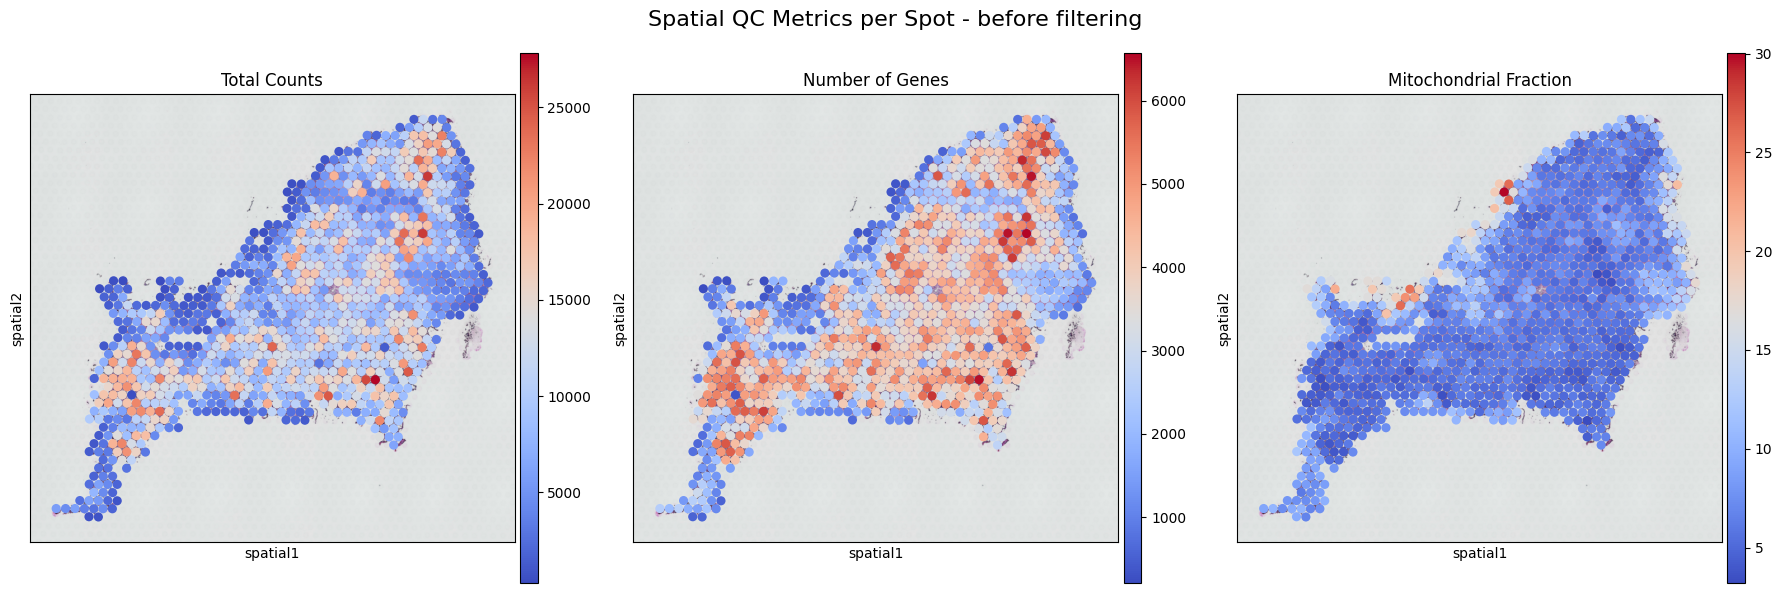

In [ ]:
qc_metrics = ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
titles = ['Total Counts', 'Number of Genes', 'Mitochondrial Fraction']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(qc_metrics):
    sc.pl.spatial(
        adata,
        img_key="hires",
        color=metric,
        ax=axs[i],
        show=False,      # prevent immediate display
        size=1.5,        # adjust dot size
        cmap='coolwarm',  # color map
        title=titles[i]
    )

fig.suptitle('Spatial QC Metrics per Spot - before filtering', fontsize=16)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of spots')

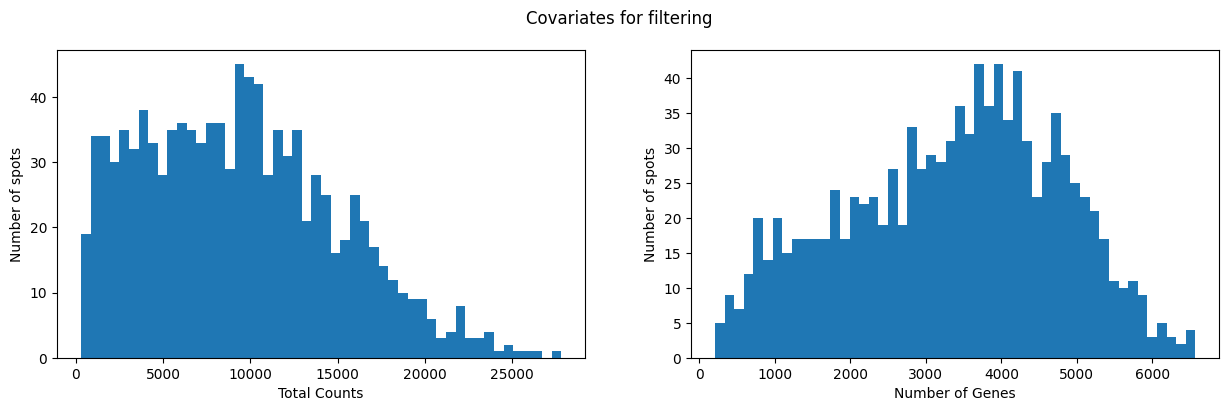

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Covariates for filtering')

# Histogram of total counts
axs[0].hist(adata.obs['total_counts'], bins=50)
axs[0].set_xlabel('Total Counts')
axs[0].set_ylabel('Number of spots')

# Histogram of number of genes
axs[1].hist(adata.obs['n_genes_by_counts'], bins=50)
axs[1].set_xlabel('Number of Genes')
axs[1].set_ylabel('Number of spots')


C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\3839810024.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


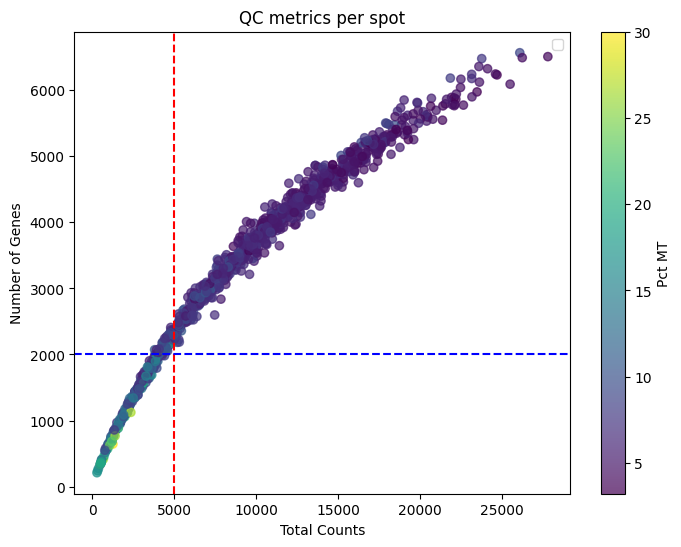

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

sc = ax.scatter(
    adata.obs['total_counts'],
    adata.obs['n_genes_by_counts'],
    c=adata.obs['pct_counts_mt'],  
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel('Total Counts')
ax.set_ylabel('Number of Genes')
ax.set_title('QC metrics per spot')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Pct MT')

# threshold lines
ax.axvline(x=5000, color='red', linestyle='--')
ax.axhline(y=2000, color='blue', linestyle='--')

ax.legend()
plt.show()


### Filtering spots
1. Only spots with total_counts >= 5000 and n_genes_by_counts >= 2000 are kept.
2. Only keep genes detected in atleast 10 spots

In [53]:
mask = (adata.obs['total_counts'] >= 5000) & (adata.obs['n_genes_by_counts'] >= 2000) 
adata = adata[mask, :].copy()
sc.pp.filter_genes(adata, min_cells=10)    

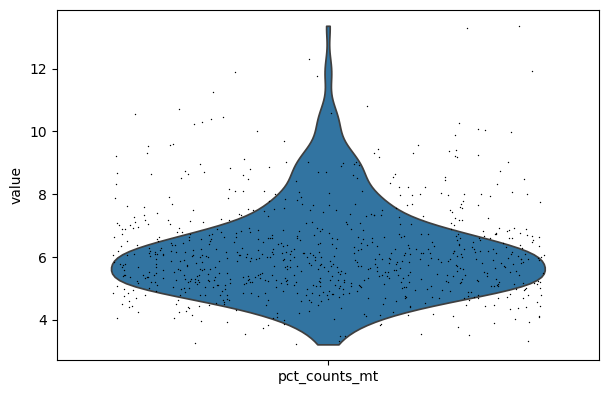

In [54]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)
# mito raction is now < 12 so no filtering on mito fraction

C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\3875693790.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\3875693790.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\3875693790.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


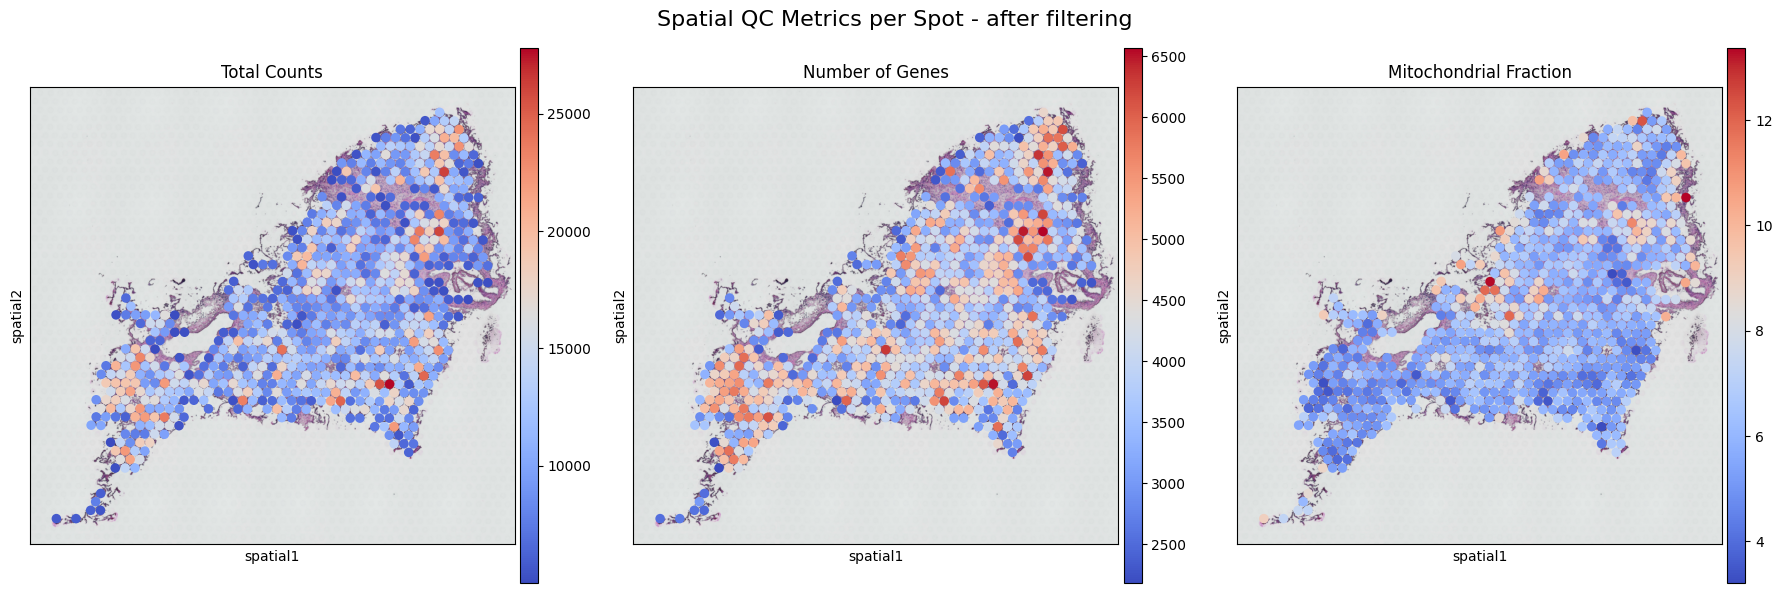

In [ ]:
qc_metrics = ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
titles = ['Total Counts', 'Number of Genes', 'Mitochondrial Fraction']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(qc_metrics):
    sc.pl.spatial(
        adata,
        img_key="hires",
        color=metric,
        ax=axs[i],
        show=False,     
        size=1.5,       
        cmap='coolwarm', 
        title=titles[i]
    )

fig.suptitle('Spatial QC Metrics per Spot - after filtering', fontsize=16)
plt.tight_layout()
plt.show()

### Normalization and finding HVGs
1. Library-size normalization
2. Logarithmic transformation
3. Highly Variable Gene (HVG) selection
 

In [56]:
sc.pp.normalize_total(adata, inplace = True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)

### Dimensionality reduction and clustering

In [57]:
sc.pp.pca(adata, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)

sc.tl.umap(adata)
sc.tl.leiden(adata)

c:\Users\19utk\anaconda3\Lib\site-packages\scanpy\preprocessing\_pca\__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
c:\Users\19utk\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\2018577287.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


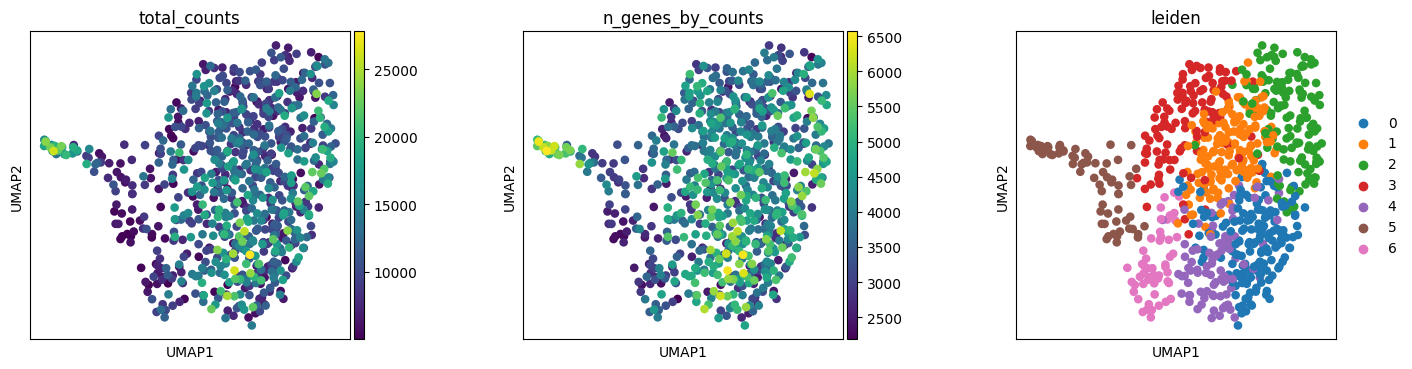

In [63]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

C:\Users\19utk\AppData\Local\Temp\ipykernel_15716\1279764846.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.3)


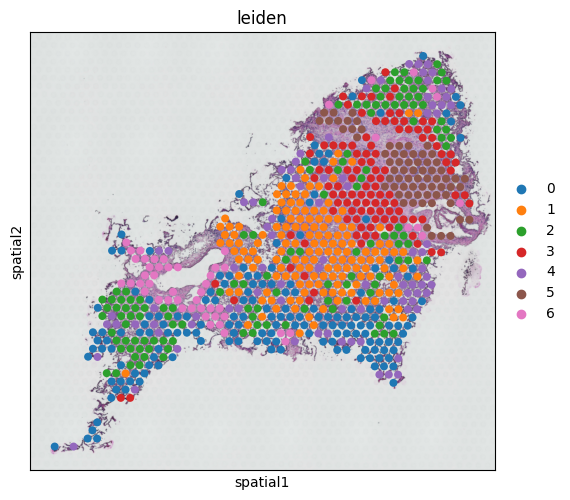

In [74]:
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.3)